In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('D:/Python/Datasets/FuelConsumptionCo2.csv')

In [5]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [10]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


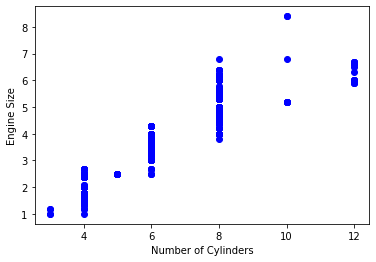

In [12]:
plt.scatter(cdf.CYLINDERS, cdf.ENGINESIZE, color = 'blue')
plt.ylabel('Engine Size')
plt.xlabel('Number of Cylinders')
plt.show()

In [13]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


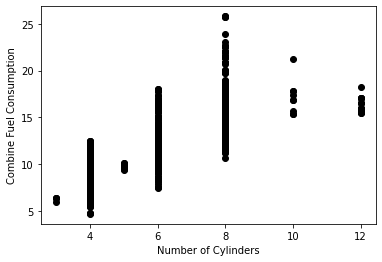

In [14]:
plt.scatter(cdf.CYLINDERS, cdf.FUELCONSUMPTION_COMB, color = 'black')
plt.xlabel('Number of Cylinders')
plt.ylabel('Combine Fuel Consumption')
plt.show()

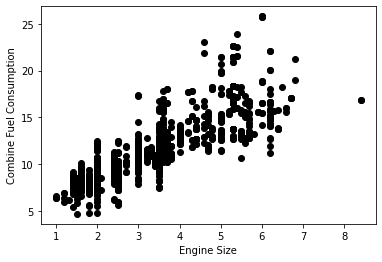

In [15]:
plt.scatter(cdf.ENGINESIZE, cdf.FUELCONSUMPTION_COMB, color = 'black')
plt.xlabel('Engine Size')
plt.ylabel('Combine Fuel Consumption')
plt.show()

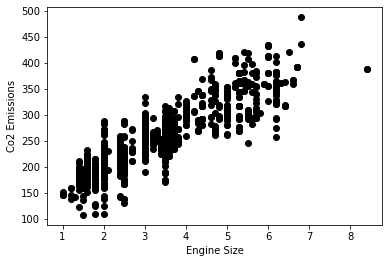

In [16]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'black')
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emissions')
plt.show()

In [31]:
#spliting the data into train and test (80% train, 20% test)
msk = np.random.rand(len(df)) < 0.8

train = cdf[msk]
test = cdf[msk]

In [32]:
train.shape

(857, 4)

In [33]:
test.shape

(857, 4)

In [34]:
cdf.shape

(1067, 4)

In [41]:
#importing the linear regression model and fitting into train_x and train_y
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(train_x, train_y)

LinearRegression()

In [42]:
#calcuting the intercept of the model
regr.intercept_

array([124.50319717])

In [43]:
#calcuting the slope of the model
regr.coef_

array([[39.52678764]])

In [44]:
#importing r2-score for calculating the error
from sklearn.metrics import r2_score

In [53]:
#combining the data to test_x and test_y
#calculating the error (r2-score error) between test_y with respect to predictions(test_y_)

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_y_ = regr.predict(test_x)

In [54]:
test_y_

array([[203.55677244],
       [219.3674875 ],
       [183.79337862],
       [262.8469539 ],
       [262.8469539 ],
       [262.8469539 ],
       [270.75231142],
       [262.8469539 ],
       [357.71124422],
       [357.71124422],
       [310.27909906],
       [310.27909906],
       [310.27909906],
       [310.27909906],
       [357.71124422],
       [203.55677244],
       [203.55677244],
       [203.55677244],
       [203.55677244],
       [203.55677244],
       [243.08356008],
       [243.08356008],
       [243.08356008],
       [243.08356008],
       [243.08356008],
       [243.08356008],
       [282.61034771],
       [243.08356008],
       [203.55677244],
       [243.08356008],
       [243.08356008],
       [243.08356008],
       [243.08356008],
       [290.51570524],
       [290.51570524],
       [330.04249288],
       [330.04249288],
       [290.51570524],
       [290.51570524],
       [330.04249288],
       [330.04249288],
       [290.51570524],
       [282.61034771],
       [243

In [55]:
test_y_.shape

(857, 1)

In [56]:
mean_absolute_error = np.mean(np.absolute(test_y_ - test_y))
mean_absolute_error

23.506242502945355

In [57]:
mse = np.mean((test_y_ - test_y) ** 2)
mse

951.3261339441904

In [58]:
R2_score = r2_score(test_y, test_y_)
R2_score

0.7689286180477397

In [59]:
train_x = train[['FUELCONSUMPTION_COMB']]
test_x = test[['FUELCONSUMPTION_COMB']]

In [60]:
regr = linear_model.LinearRegression()

In [61]:
regr.fit(train_x, train_y)

LinearRegression()

In [62]:
predictions = regr.predict(test_x)
predictions

array([[206.86772641],
       [224.49686049],
       [165.19886403],
       [248.53658879],
       [240.52334602],
       [232.51010326],
       [248.53658879],
       [237.31804891],
       [320.65577367],
       [320.65577367],
       [306.2319367 ],
       [317.45047657],
       [306.2319367 ],
       [317.45047657],
       [320.65577367],
       [230.9074547 ],
       [219.68891483],
       [230.9074547 ],
       [219.68891483],
       [234.11275181],
       [245.33129168],
       [203.6624293 ],
       [250.13923734],
       [203.6624293 ],
       [250.13923734],
       [250.13923734],
       [270.97366853],
       [206.86772641],
       [237.31804891],
       [250.13923734],
       [216.48361772],
       [282.1922084 ],
       [245.33129168],
       [304.62928814],
       [354.31139329],
       [317.45047657],
       [355.91404184],
       [304.62928814],
       [354.31139329],
       [317.45047657],
       [355.91404184],
       [283.79485695],
       [272.57631708],
       [253

In [63]:
mse = np.asanyarray(np.mean(np.abs(predictions - test_y)))

In [64]:
mse

array(21.19910178)